# **Evaluation & Results**

In [2]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [3]:
!rm -rf veinsecure-palm-vein-authentication
!git clone https://github.com/anjorisarabhai/veinsecure-palm-vein-authentication.git

Cloning into 'veinsecure-palm-vein-authentication'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 262 (delta 63), reused 33 (delta 22), pack-reused 137 (from 1)
Receiving objects: 100% (262/262), 11.38 MiB | 15.90 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [4]:
import sys
sys.path.append('/content/veinsecure-palm-vein-authentication')

In [5]:
!touch /content/veinsecure-palm-vein-authentication/utils/__init__.py

In [6]:
!wget -O /content/veinsecure-palm-vein-authentication/utils/helpers.py https://raw.githubusercontent.com/anjorisarabhai/veinsecure-palm-vein-authentication/main/utils/helpers.py

--2025-06-18 10:08:39--  https://raw.githubusercontent.com/anjorisarabhai/veinsecure-palm-vein-authentication/main/utils/helpers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4571 (4.5K) [text/plain]
Saving to: ‘/content/veinsecure-palm-vein-authentication/utils/helpers.py’

/content/veinsecure 100%[===================>]   4.46K  --.-KB/s    in 0s      

2025-06-18 10:08:39 (60.8 MB/s) - ‘/content/veinsecure-palm-vein-authentication/utils/helpers.py’ saved [4571/4571]



In [7]:
!ls -R /content/veinsecure-palm-vein-authentication

/content/veinsecure-palm-vein-authentication:
data   notebooks      README.md		results
model  preprocessing  requirements.txt	utils

/content/veinsecure-palm-vein-authentication/data:
README.md

/content/veinsecure-palm-vein-authentication/model:
train_model.py

/content/veinsecure-palm-vein-authentication/notebooks:
palm_vein_baseline_cnn_model.ipynb  README.md
Palm_Vein_EDA.ipynb		    train_model.ipynb
Palm_Vein_Preprocess.ipynb

/content/veinsecure-palm-vein-authentication/preprocessing:
palm_vein_preprocess.py  README.md

/content/veinsecure-palm-vein-authentication/results:
logs  models  plots

/content/veinsecure-palm-vein-authentication/results/logs:
training_log.csv

/content/veinsecure-palm-vein-authentication/results/models:
final_model.h5

/content/veinsecure-palm-vein-authentication/results/plots:
learning_curves.png

/content/veinsecure-palm-vein-authentication/utils:
helpers.py  __init__.py


In [8]:
import os
print(os.listdir('/content/veinsecure-palm-vein-authentication/utils'))

['helpers.py', '__init__.py']


In [9]:
!ls /content/veinsecure-palm-vein-authentication/utils
!sed -n '1,20p' /content/veinsecure-palm-vein-authentication/utils/helpers.py

helpers.py  __init__.py
# -*- coding: utf-8 -*-
"""helpers.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1wZh4H_FGlBCgbYLvhelB5mwziKwCSpig
"""

import os

# Create the utils directory if it doesn't exist
os.makedirs('utils', exist_ok=True)

# Full helper code
helper_code = '''
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [10]:
!head -n 127 /content/veinsecure-palm-vein-authentication/utils/helpers.py

# -*- coding: utf-8 -*-
"""helpers.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1wZh4H_FGlBCgbYLvhelB5mwziKwCSpig
"""

import os

# Create the utils directory if it doesn't exist
os.makedirs('utils', exist_ok=True)

# Full helper code
helper_code = '''
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

def load_processed_images(data_dir, img_size=(128, 128)):
    X, y = [], []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
          

In [11]:
import importlib
import utils.helpers
importlib.reload(utils.helpers)

✅ helpers.py updated with loader, generators, pipelines, and batch visualization.


<module 'utils.helpers' from '/content/veinsecure-palm-vein-authentication/utils/helpers.py'>

In [12]:
from utils.helpers import create_data_generators, load_processed_images

In [13]:
from google.colab import files
uploaded = files.upload()

Saving processed_dataset.zip to processed_dataset.zip


In [14]:
import zipfile
import os

zip_path = "processed_dataset.zip"
extract_path = "processed_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)

Extracted to: processed_dataset


In [15]:
!wget https://github.com/anjorisarabhai/veinsecure-palm-vein-authentication/raw/main/processed_dataset.zip
!unzip processed_dataset.zip

--2025-06-18 10:12:14--  https://github.com/anjorisarabhai/veinsecure-palm-vein-authentication/raw/main/processed_dataset.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-18 10:12:15 ERROR 404: Not Found.

Archive:  processed_dataset.zip
   creating: processed_dataset/011/
  inflating: processed_dataset/011/011_F_R_3.JPG  
  inflating: processed_dataset/011/011_F_L_38.JPG  
  inflating: processed_dataset/011/011_S_R_18.JPG  
  inflating: processed_dataset/011/011_F_R_6.JPG  
  inflating: processed_dataset/011/011_F_R_8.JPG  
  inflating: processed_dataset/011/011_S_R_16.JPG  
  inflating: processed_dataset/011/011_S_R_10.JPG  
  inflating: processed_dataset/011/011_F_L_32.JPG  
  inflating: processed_dataset/011/011_S_L_20.JPG  
  inflating: processed_dataset/011/011_S_R_11.JPG  
  inflating: processed_dataset/011/011_F_L_37.JPG  
  inflating: pro

### **Load data & labels and Create generators**

In [16]:
X, y, class_names = load_processed_images("processed_dataset")
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

_, _, test_gen = create_data_generators(X, y_encoded, batch_size=32, augment=False)

In [20]:
!git lfs install

Git LFS initialized.


### **Load the trained model**

In [21]:
model = load_model("veinsecure-palm-vein-authentication/results/models/final_model.h5")

### **Predict on test set**

In [26]:
y_true = []
y_pred = []

for i in range(len(test_gen)):
    x_batch, y_batch = test_gen[i]
    y_true.extend(np.argmax(y_batch, axis=1))
    preds = model.predict(x_batch)
    y_pred.extend(np.argmax(preds, axis=1))
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


### **Evaluation metrics**

In [27]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

In [28]:
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Accuracy: 0.8471074380165289
Precision: 0.8774487030584592
Recall: 0.8414634146341465
F1 Score: 0.8377611548343256


### **Save summary to CSV**

In [29]:
summary_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [acc, prec, rec, f1]
})

In [30]:
os.makedirs("results", exist_ok=True)
summary_df.to_csv("results/evaluation_summary.csv", index=False)

### **Confusion matrix**

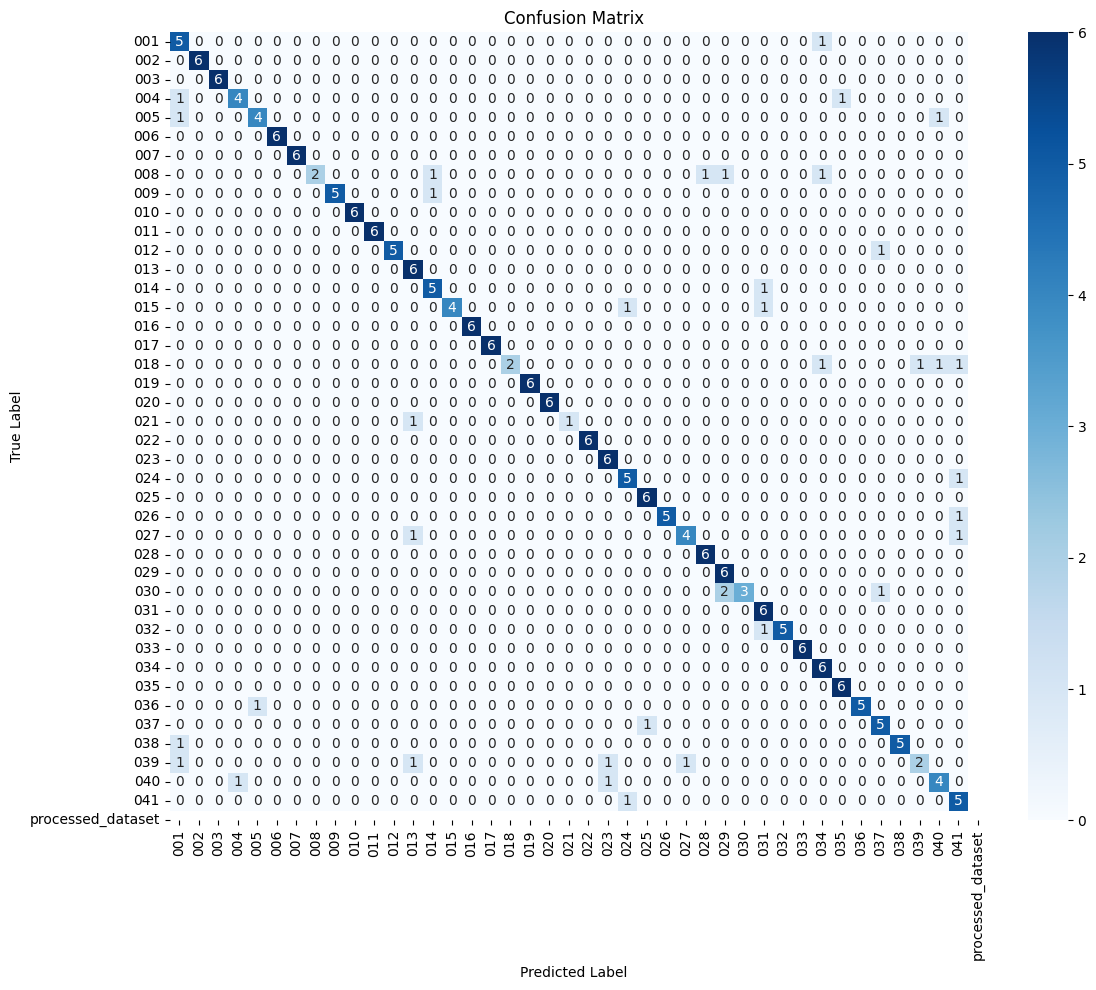

In [32]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

os.makedirs("results/plots", exist_ok=True)
plt.savefig("results/plots/confusion_matrix.png")
plt.close()

In [33]:
import shutil
shutil.make_archive("results", 'zip', "results")

'/content/results.zip'

In [34]:
from google.colab import files
files.download("results.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>